# SVM
### Carlos Marcelo Barrera Nolasco
### 101893

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from __future__ import division
import seaborn as sns
sns.set()

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 6.0)

## Ejercicio 1 (Archivo andSVM_2)

#### Leyendo los datos

In [4]:
df = pd.read_csv("../Recursos/andSVM_2.csv")

In [5]:
X = df[["X1","X2"]]
Y = df[["y"]]

X = np.array(X)
Y = np.array(Y)

### Entrenando el perceptrón

#### Declaracion de variables

In [6]:
input_size=2
output_layer_size=1
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size]) 
W_layer1=tf.Variable(tf.random_uniform([input_size,output_layer_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer1")


#### Grafo

In [7]:
y = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1) #la de nuestra
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

In [8]:
init = tf.global_variables_initializer()
sess = tf.Session() 

#### Corremos el programa

In [9]:
sess.run(init)

In [10]:
for i in range(5000):
  sess.run(train_step, feed_dict={x: X, y_: Y})

#### Cuantificar Error

In [11]:
correct_prediction = tf.equal(tf.round(y),y_)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y_: Y}))

1.0


#### Visualizar Barrera de Decisión.

In [12]:
w=[sess.run(b_layer1, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: X, y_: Y})]

In [13]:
m=((w[0]/w[2]))/((-w[0]/w[1]))

(-2.2, 5.2)

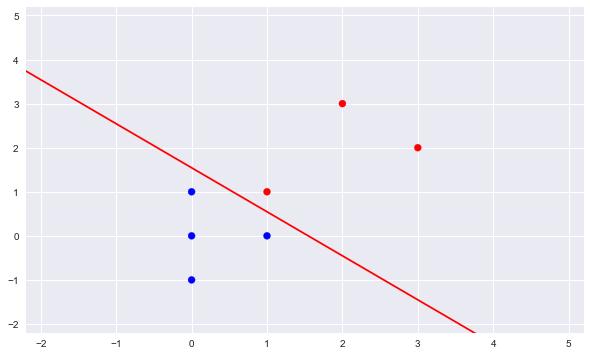

In [14]:
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
x2 = np.linspace(-2.2,5.2,100) # 100 numeros espaciados
plt.plot(x2,-w[0]/w[2]+m*x2,color='red')
plt.ylim([-2.2,5.2])
plt.xlim([-2.2,5.2])

In [15]:
sess.close()

### SVM con C=1

In [16]:
classifier = SVC(kernel='linear')
classifier.fit(X, Y)

/Users/karlosss/Documents/ITAM/Machine-Learning/VirtualEnvs/clase-1/lib/python2.7/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Graficamos los puntos, la barrera de decisión y los márgenes

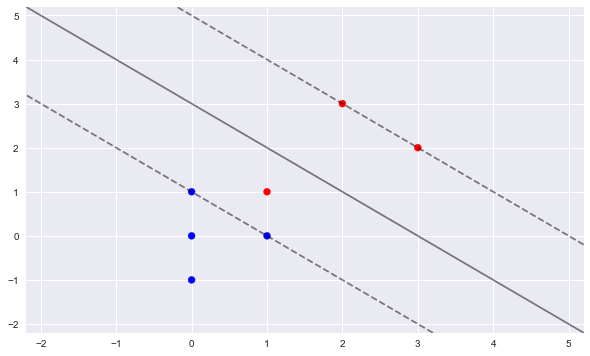

In [17]:
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
plt.ylim([-2.2,5.2])
plt.xlim([-2.2,5.2])

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show()

### SVM con C=100

In [18]:
classifier = SVC(kernel='linear', C=100)
classifier.fit(X, Y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Graficamos los puntos, la barrera de decisión y los márgenes

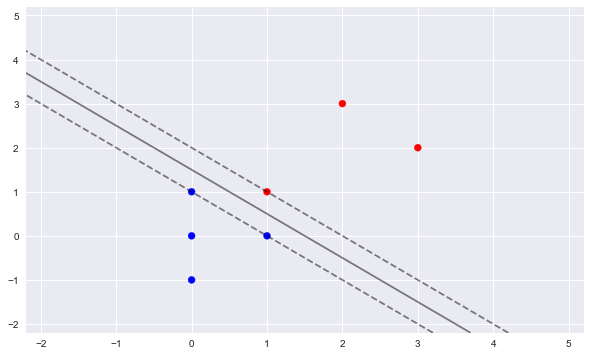

In [19]:
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
plt.ylim([-2.2,5.2])
plt.xlim([-2.2,5.2])

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show()

### Observación

Como podemos observar, el valor del parámetro C que es la penalización del error tiene un efecto notable cuando cambia de 1 a 100; cuando su valor es 1, el modelo se "relaja" y permite clasificar erróneamente un punto. Por otro lado, si elevamos el valor de este parámetro a 100, vemos que es mucho más riguroso por lo que la banda entre los vectores se estrecha y clasifica correctamente todos los puntos.

## Ejercicio 2 (Círculo)

#### Generando los datos de entrenamiento

In [20]:
X_ej_2 = np.random.rand(2500,2)
Y_ej_2 = []
for i in range(0, len(X_ej_2)):
    Y_ej_2.append([1] if ((X_ej_2[i][0]-0.5)**2)+((X_ej_2[i][1]-0.5)**2)<=0.4**2 else [0])
Y_ej_2 = np.array(Y_ej_2)

#### Visualización de los datos de entrenamiento

(0, 1)

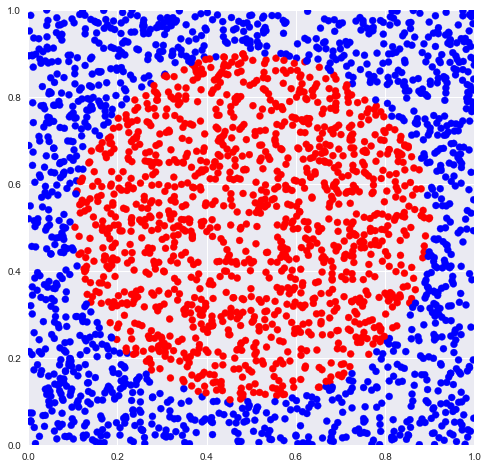

In [21]:
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.scatter(X_ej_2[:,0],X_ej_2[:,1], c=['red' if i==1 else 'blue' for i in Y_ej_2])
plt.ylim([0,1])
plt.xlim([0,1])

### Con ANN (2 neuronas en el input, 6 neuronas en la capa oculta y 1 neurona de salida)

#### Variables / Placeholders

In [22]:
iterations_ej_2 = 50000
cte_aprendizaje_ej_2 = 0.01
input_size_ej_2=2
hidden_layer_size_ej_2= 6
output_layer_size_ej_2= 1

x_ej_2 = tf.placeholder(tf.float32, [None, input_size_ej_2])
y_ej_2_ = tf.placeholder(tf.float32, [None, output_layer_size_ej_2]) 

W_layer1_ej_2 =tf.Variable(tf.random_uniform([input_size_ej_2,hidden_layer_size_ej_2], -1, 1), name="W_layer1_ej_2")
W_layer2_ej_2 =tf.Variable(tf.random_uniform([hidden_layer_size_ej_2,output_layer_size_ej_2], -1, 1), name="W_layer2_ej_2")
b_layer1_ej_2 = tf.Variable(tf.zeros([hidden_layer_size_ej_2]), name="b_layer1_ej_2")
b_layer2_ej_2 = tf.Variable(tf.zeros([output_layer_size_ej_2]), name="b_layer2_ej_2")

#### Grafo

In [23]:
hidden_1_ej_2 = tf.nn.sigmoid(tf.matmul(x_ej_2, W_layer1_ej_2) + b_layer1_ej_2)
y_ej_2 = tf.nn.sigmoid(tf.matmul(hidden_1_ej_2, W_layer2_ej_2) + b_layer2_ej_2)

lossfn_ej_2 = tf.reduce_mean(tf.reduce_sum((y_ej_2_-y_ej_2)**2))
train_step_ej_2 = tf.train.GradientDescentOptimizer(cte_aprendizaje_ej_2).minimize(lossfn_ej_2)

#### Inicializamos la sesión

In [24]:
init = tf.global_variables_initializer()
sess = tf.Session()

#### Corremos el programa

In [25]:
sess.run(init)
for i in range(iterations_ej_2):
  sess.run(train_step_ej_2, feed_dict={x_ej_2: X_ej_2, y_ej_2_: Y_ej_2})

#### Accuracy

In [26]:
correct_prediction_ej_2 = tf.equal(tf.round(y_ej_2),y_ej_2_)
accuracy_ej_2 = tf.reduce_mean(tf.cast(correct_prediction_ej_2, tf.float32))
accuracy_ej_2_calc = sess.run(accuracy_ej_2, feed_dict={x_ej_2: X_ej_2, y_ej_2_: Y_ej_2})
print("Accuracy: "+str(accuracy_ej_2_calc))

Accuracy: 0.9852


#### Visualizacion de las predicciones

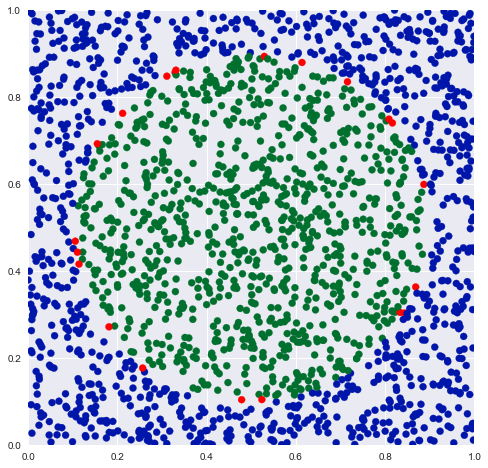

In [27]:
x_vis_ej_2 = np.random.rand(2000,2)
y_predict_vis_ej_2 = sess.run(y_ej_2, feed_dict={x_ej_2:x_vis_ej_2})
y_predict_vis_ej_2 = np.round(y_predict_vis_ej_2)
y_real_vis_ej_2 = []
col = []
for i in range(0, len(x_vis_ej_2)):
    y_real_vis_ej_2.append([1] if ((x_vis_ej_2[i][0]-0.5)**2)+((x_vis_ej_2[i][1]-0.5)**2)<=0.4**2 else [0])
    if (y_predict_vis_ej_2[i][0] == 0 and y_real_vis_ej_2[i][0] == 0):
        col.append("#0016aa")
    elif (y_predict_vis_ej_2[i][0] == 1 and y_real_vis_ej_2[i][0] == 1):
        col.append("#00702e")
    else:
        col.append("red")

y_real_vis_ej_2=np.array(y_real_vis_ej_2)
    
plt.scatter(x_vis_ej_2[:,0],x_vis_ej_2[:,1], c=col)

plt.ylim([0,1])
plt.xlim([0,1])

plt.show()
plt.clf()

En la gráfica anterior podemos ver en verde los puntos clasificados correctamente como dentro del círculo, en azul los puntos clasificados correctamente como fuera del círculo y en rojo los puntos que fueron clasificados erroneamente.

In [28]:
sess.close

<bound method Session.close of <tensorflow.python.client.session.Session object at 0x119322a10>>

#### Matriz de Confusión

In [29]:
mat_ann = confusion_matrix(y_real_vis_ej_2, y_predict_vis_ej_2)
print(mat_ann)

[[1027    1]
 [  20  952]]


Podemos observar que de 2000 datos aleatorios pudimos predecir correctamente 1979 mientras que el número de datos mal clasificados fue **21**, es decir un **1.05%** de los valores. Como vimos en la gráfica anterior, los pundos clasificados erroneamente se encuentran muy cerca del perímetro del círculo.

### Utilizando SVM

In [30]:
classifier_ej_2 = SVC(kernel='rbf', C=1)
classifier_ej_2.fit(X_ej_2, Y_ej_2)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Visualización de las predicciones

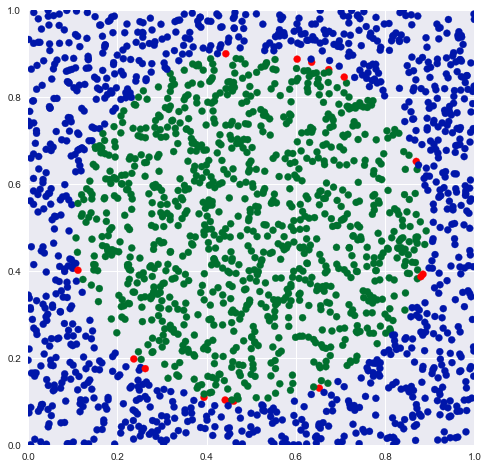

In [31]:
x_vis_ej_2_2 = np.random.rand(2000,2)
y_predict_vis_ej_2_2 = classifier_ej_2.predict(x_vis_ej_2_2)
y_real_vis_ej_2_2 = []
col_ej_2_2 = []

for i in range(0, len(x_vis_ej_2_2)):
    y_real_vis_ej_2_2.append([1] if ((x_vis_ej_2_2[i][0]-0.5)**2)+((x_vis_ej_2_2[i][1]-0.5)**2)<=0.4**2 else [0])
    if (y_predict_vis_ej_2_2[i] == 0 and y_real_vis_ej_2_2[i][0] == 0):
        col_ej_2_2.append("#0016aa")
    elif (y_predict_vis_ej_2_2[i] == 1 and y_real_vis_ej_2_2[i][0] == 1):
        col_ej_2_2.append("#00702e")
    else:
        col_ej_2_2.append("red")

y_real_vis_ej_2_2=np.array(y_real_vis_ej_2_2)
    
plt.scatter(x_vis_ej_2_2[:,0],x_vis_ej_2_2[:,1], c=col_ej_2_2)

plt.ylim([0,1])
plt.xlim([0,1])

plt.show()
plt.clf()


En esta figura nuevamente presentamos los datos mal clasificados en rojo y volvemos a apreciar que se encuentran cercanos al borde del círculo.

#### Matriz de confusión

In [32]:
mat_svm = confusion_matrix(y_real_vis_ej_2_2, y_predict_vis_ej_2_2)
print(mat_svm)

[[993  13]
 [  3 991]]


En este caso nos encontramos con que **16** de los 2000 datos fueron clasificados de manera incorrecta, es decir un **0.8%** de ellos. Comparando con los resultados obtenidos con la red neuronal, el desempeño del SVM fue muy similar (aunque es más exacto el SVM por 0.25%)